In [12]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



In [14]:
df=pd.read_csv("pcos_dataset.csv")
df.head()


,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [16]:
df["PCOS_Diagnosis"].unique()

array([0, 1], dtype=int64)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [20]:
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [22]:
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


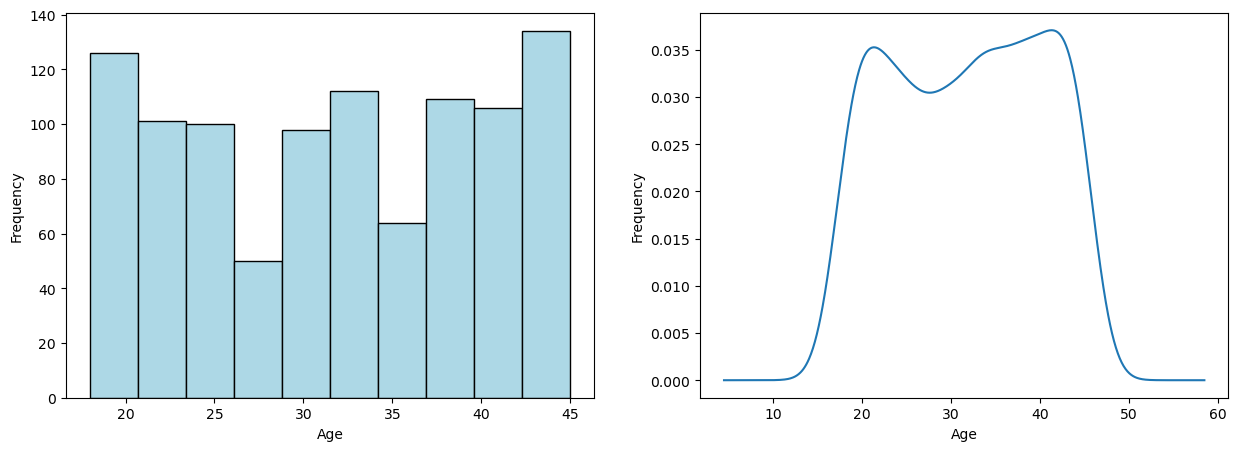

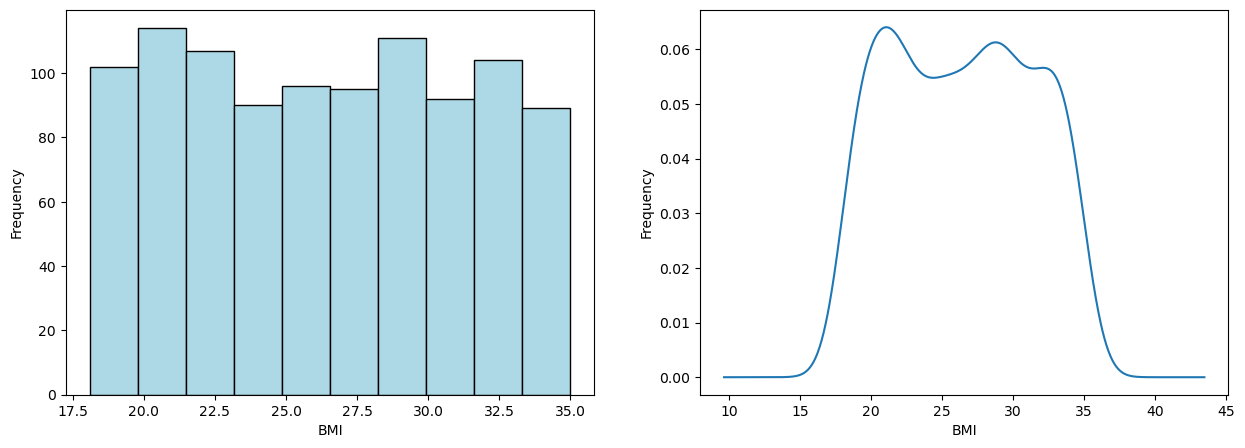

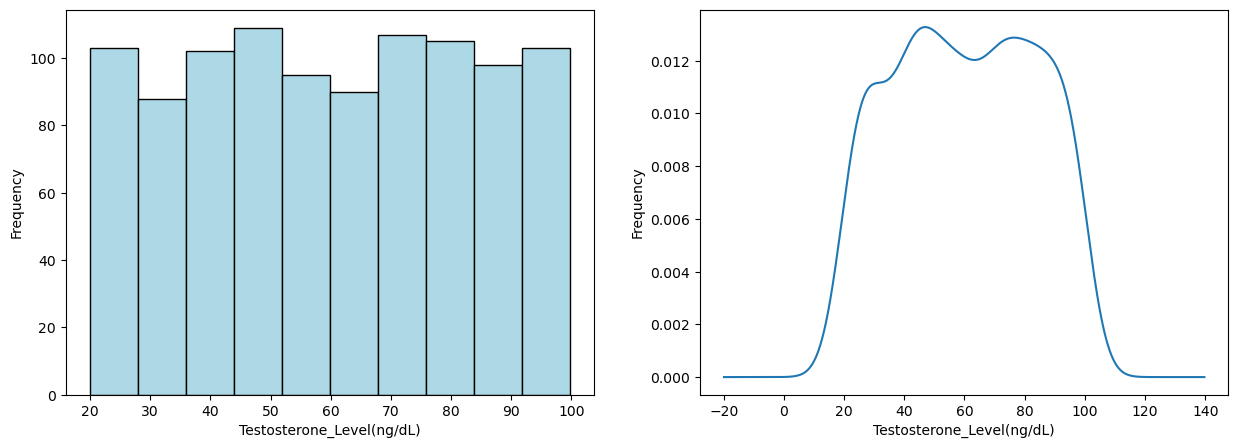

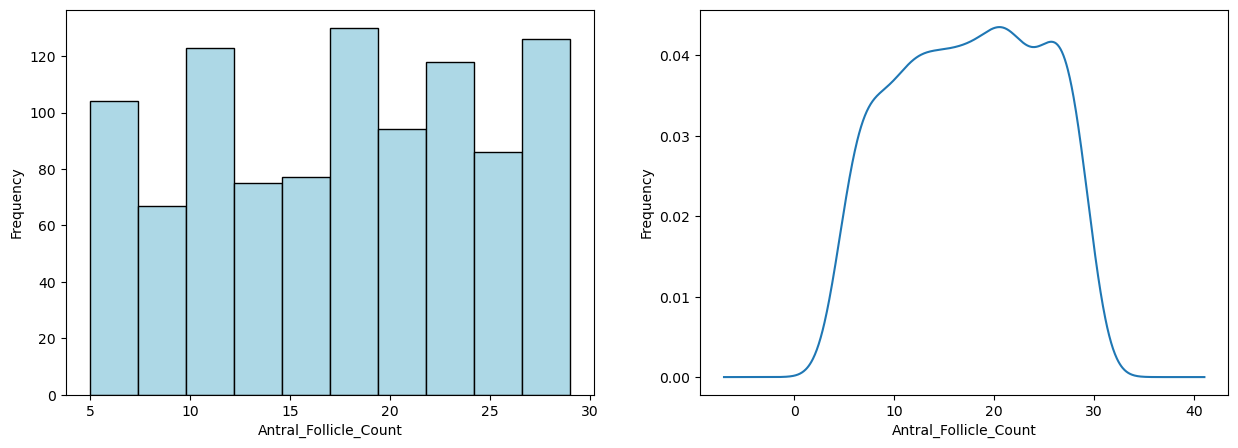

In [24]:
for i in ['Age','BMI','Testosterone_Level(ng/dL)','Antral_Follicle_Count']:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df[i].plot(kind='hist',edgecolor='black',color='lightblue')
    plt.ylabel('Frequency')
    plt.xlabel(i)
    
    plt.subplot(1,2,2)
    df[i].plot(kind='kde')
    plt.ylabel('Frequency')
    plt.xlabel(i)

<Axes: ylabel='count'>

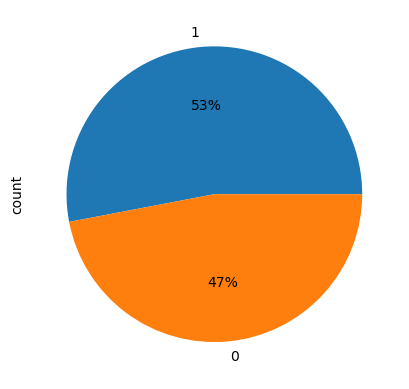

In [28]:
df["Menstrual_Irregularity"].value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

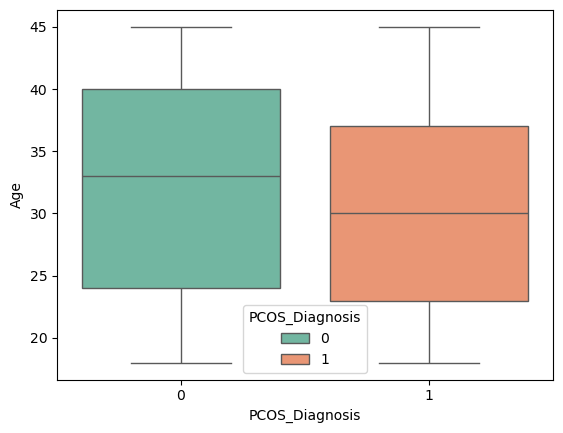

In [34]:
import seaborn as sns
sns.boxplot(x='PCOS_Diagnosis', y='Age', data=df, hue='PCOS_Diagnosis', palette='Set2')
plt.show()


In [36]:
bmi_mean = df.groupby('PCOS_Diagnosis')['BMI'].mean()

In [38]:
bmi_mean

PCOS_Diagnosis
0    25.457928
1    30.126633
Name: BMI, dtype: float64

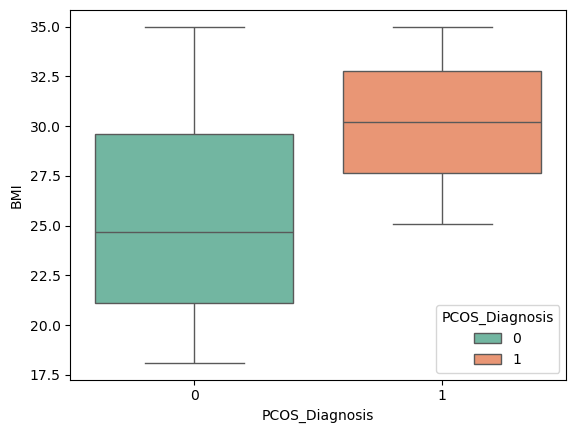

In [48]:
sns.boxplot(x='PCOS_Diagnosis', y='BMI', data=df, hue='PCOS_Diagnosis', palette='Set2')
plt.show()


In [52]:
cross = pd.crosstab(df['Menstrual_Irregularity'], df['PCOS_Diagnosis'])
cross

PCOS_Diagnosis,0,1
Menstrual_Irregularity,,
0,470,0
1,331,199


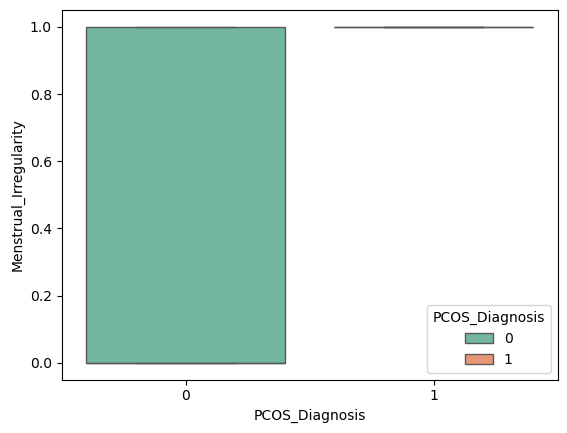

In [54]:
sns.boxplot(x='PCOS_Diagnosis', y='Menstrual_Irregularity', data=df, hue='PCOS_Diagnosis', palette='Set2')
plt.show()


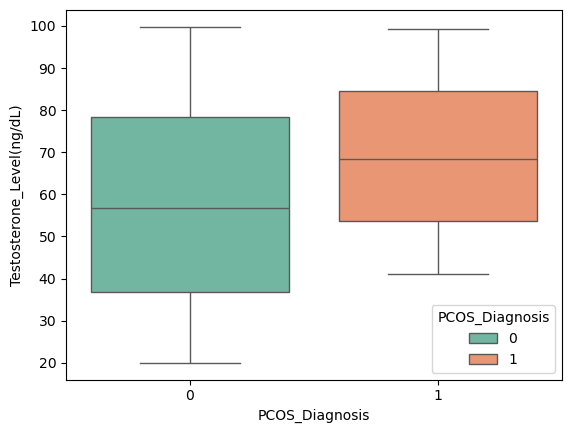

In [62]:
sns.boxplot(x='PCOS_Diagnosis', y='Testosterone_Level(ng/dL)', data=df, hue='PCOS_Diagnosis', palette='Set2')
plt.show()


In [70]:
T_mean = df.groupby('PCOS_Diagnosis')['Testosterone_Level(ng/dL)'].mean()
T_mean

PCOS_Diagnosis
0    57.842447
1    69.485930
Name: Testosterone_Level(ng/dL), dtype: float64

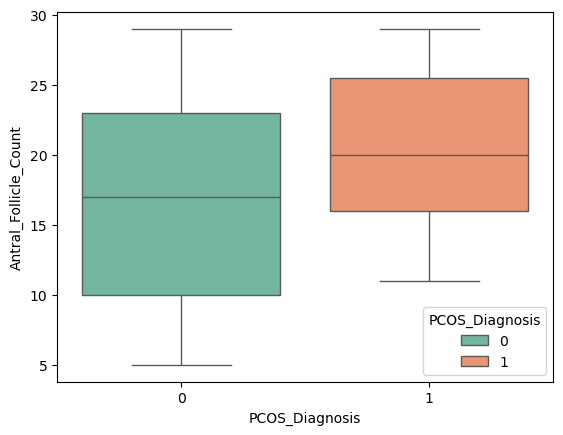

In [72]:
sns.boxplot(x='PCOS_Diagnosis', y='Antral_Follicle_Count', data=df, hue='PCOS_Diagnosis', palette='Set2')
plt.show()


In [76]:
AFC_mean = df.groupby('PCOS_Diagnosis')['Antral_Follicle_Count'].mean()
AFC_mean

PCOS_Diagnosis
0    16.792759
1    20.190955
Name: Antral_Follicle_Count, dtype: float64

<Axes: >

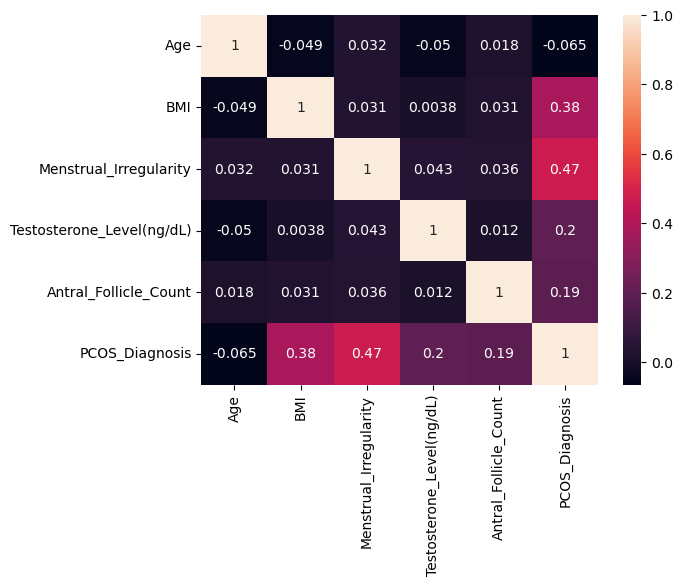

In [78]:
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)

In [80]:
df.shape

(1000, 6)

In [86]:
x = df.drop(columns = ['PCOS_Diagnosis'], axis =1)
y = df['PCOS_Diagnosis']

In [88]:
from sklearn.model_selection import train_test_split,cross_val_score

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['PCOS_Diagnosis'],axis=1), df['PCOS_Diagnosis'], test_size=0.2, random_state=2)
x_test.shape

(200, 5)

In [90]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score

print("Accuracy Score : " , accuracy_score(y_test,y_pred))

Accuracy Score :  0.935


In [96]:
scores = cross_val_score(lr, x, y, cv=5, scoring='accuracy')
print("Mean Cross-validation scores:", np.mean(scores))


Mean Cross-validation scores: 0.914


In [98]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred1=dc.predict(x_test)
y_pred1

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [100]:
print("Accuracy Score : " , accuracy_score(y_test,y_pred1))

Accuracy Score :  1.0


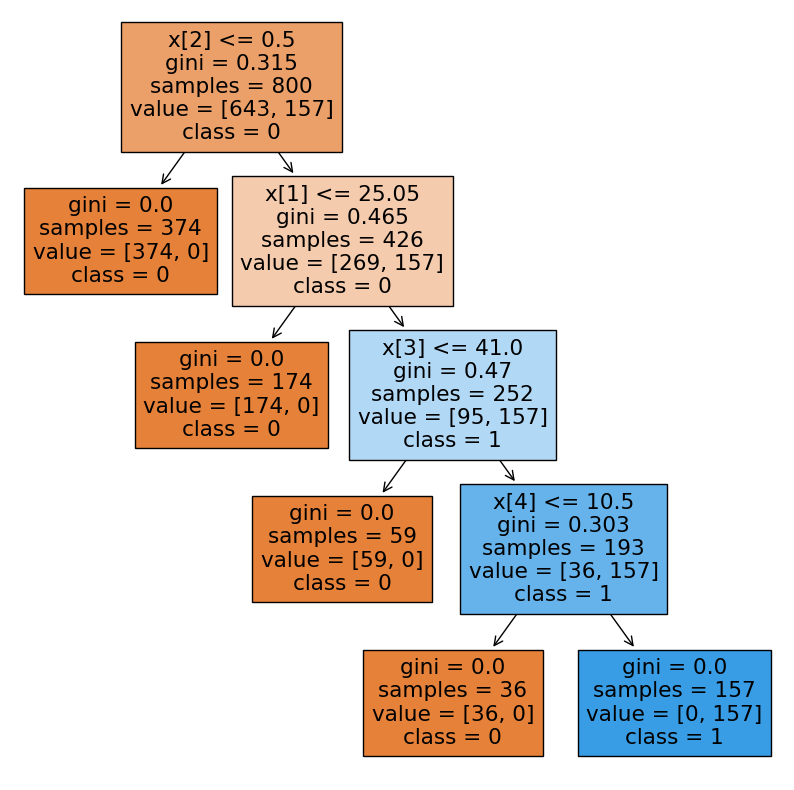

In [102]:
plt.figure(figsize=(10,10))

plot_tree(dc,filled=True,class_names=[str(i) for i in np.unique(df['PCOS_Diagnosis'])])
plt.show()

In [104]:
from sklearn.svm import SVC

svc=SVC(C=20,kernel='linear')
svc.fit(x_train,y_train)
y_pred2=svc.predict(x_test)
y_pred2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [106]:
print("Accuracy Score : " , accuracy_score(y_test,y_pred2))

Accuracy Score :  0.94


In [108]:
print(f"Logistic Regression Accuracy Score :  {accuracy_score(y_test,y_pred)*100} % ")
print(f"Decision Tree Accuracy Score :  {accuracy_score(y_test,y_pred1)*100} %")
print(f"SVM Accuracy Score :  {accuracy_score(y_test,y_pred2)*100} % ")

Logistic Regression Accuracy Score :  93.5 % 
Decision Tree Accuracy Score :  100.0 %
SVM Accuracy Score :  94.0 % 
